# Minimal OpenSCM-Runner example with MAGICC

MAGICC can be downloaded from [magicc.org](https://magicc.org/download/magicc7).

In [1]:
# NBVAL_IGNORE_OUTPUT
import openscm_runner
import openscm_runner.utils

<IPython.core.display.Javascript object>

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner/src/openscm_runner/progress.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
openscm_runner.__version__

'0.10.1.dev34+g62eaa6e'

In [3]:
import os.path

import matplotlib.pyplot as plt
import scmdata

To run MAGICC, we need to set the following environment variable so OpenSCM-Runner knows where to look for the MAGICC binary.

In [4]:
os.environ["MAGICC_EXECUTABLE_7"] = os.path.join("..", "bin", "magicc", "magicc-v7.5.3", "bin", "magicc")

In [5]:
magicc7 = openscm_runner.adapters.MAGICC7

In [6]:
# NBVAL_IGNORE_OUTPUT
magicc7.get_version()

'v7.5.3'

In [10]:
# NBVAL_IGNORE_OUTPUT
input_emissions = scmdata.ScmRun(
    os.path.join(
        "..", "tests", "test-data", "clean_scenarios_full_ssps.csv"
    ),
    lowercase_cols=True,
)

input_emissions.head(30)

time                                                                                  2015-01-01 00:00:00  \
activity_id    mip_era model   region scenario unit             variable                                    
not_applicable CMIP6   AIM/CGE World  ssp370   Mt BC/yr         Emissions|BC                     9.727424   
                                               Mt CH4/yr        Emissions|CH4                  388.072796   
                                               Mt CO/yr         Emissions|CO                   934.349885   
                                               kt HFC125/yr     Emissions|HFC125                78.790600   
                                               kt HFC134a/yr    Emissions|HFC134a              201.953400   
                                               kt HFC143a/yr    Emissions|HFC143a               32.381000   
                                               kt HFC152a/yr    Emissions|HFC152a               55.881400   
                                               kt HFC227ea/yr   Emissions|HFC227ea               3.663300   
                                               kt HFC23/yr      Emissions|HFC23                 14.485700   
                                               kt HFC236fa/yr   Emissions|HFC236fa               0.260400   
                                               kt HFC245fa/yr   Emissions|HFC245fa              11.728500   
                                               kt HFC32/yr      Emissions|HFC32                 38.579200   
                                               kt HFC365mfc/yr  Emissions|HFC365mfc              4.649200   
                                               kt HFC4310mee/yr Emissions|HFC4310mee             1.151600   
                                               kt NF3/yr        Emissions|NF3                    1.358100   
                                               kt C2F6/yr       Emissions|C2F6                   1.570000   
                                               kt C3F8/yr       Emissions|C3F8                   0.447800   
                                               kt C4F10/yr      Emissions|C4F10                  0.099400   
                                               kt C5F12/yr      Emissions|C5F12                  0.043500   
                                               kt C6F14/yr      Emissions|C6F14                  0.350000   
                                               kt C7F16/yr      Emissions|C7F16                  0.233800   
                                               kt C8F18/yr      Emissions|C8F18                  0.101400   
                                               kt CF4/yr        Emissions|CF4                   10.869900   
                                               kt cC4F8/yr      Emissions|cC4F8                  1.267200   
                                               kt SF6/yr        Emissions|SF6                    8.020000   
                                               kt SO2F2/yr      Emissions|SO2F2                  2.531700   
                                               kt CCl4/yr       Emissions|CCl4                  47.547600   
                                               kt CFC11/yr      Emissions|CFC11                 43.573400   
                                               kt CFC113/yr     Emissions|CFC113                 0.874200   
                                               kt CFC114/yr     Emissions|CFC114                 1.669600   

time                                                                                  2016-01-01 00:00:00  \
activity_id    mip_era model   region scenario unit             variable                                    
not_applicable CMIP6   AIM/CGE World  ssp370   Mt BC/yr         Emissions|BC                     9.827463   
                                               Mt CH4/yr        Emissions|CH4                  394.145751   
                                               Mt CO/yr         Emissions|C

In [11]:
# NBVAL_IGNORE_OUTPUT
magicc_res = openscm_runner.run(
    climate_models_cfgs={
        "MAGICC7": [
            {},  # passing an empty list of an empty dict will run with defaults
            {"core_climatesensitivity": 3.0},
            {"core_climatesensitivity": 3.5},
            {"core_climatesensitivity": 2.5},
        ],
    },
    scenarios=input_emissions,
    output_variables=(
        "Surface Air Temperature Change",
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|SOx",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Historical data has not been checked


Writing SCEN7 files:   0%|          | 0.00/10.0 [00:00<?, ?it/s]

Front serial:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

Front parallel:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

Parallel runs:   0%|          | 0.00/36.0 [00:00<?, ?it/s]

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is MAGICC.

In [12]:
# NBVAL_IGNORE_OUTPUT
magicc_res.get_unique_meta("climate_model", no_duplicates=True)

'MAGICCv7.5.3'

In [13]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner/venv/lib/python3.7/site-packages/scmdata/run.py:168: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


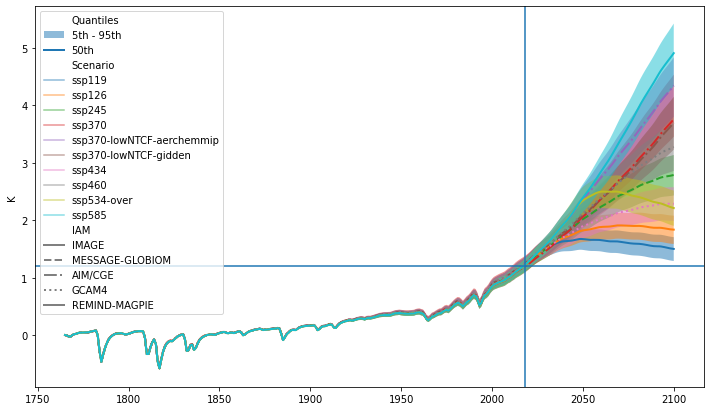

In [14]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
magicc_res.filter(variable="Surface Air Temperature Change", region="World").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.2)
ax.axvline(2018)

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner/venv/lib/python3.7/site-packages/scmdata/run.py:168: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


(<AxesSubplot:ylabel='ppm'>,
  <matplotlib.lines.Line2D at 0x12669ed90>])

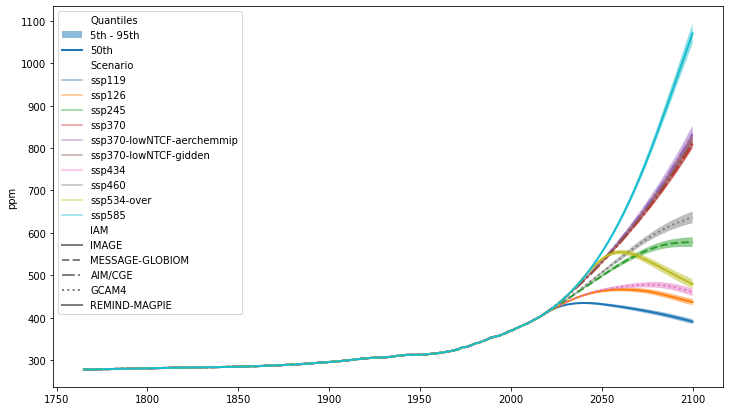

In [15]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
magicc_res.filter(variable="Atmospheric Concentrations|CO2", region="World").plumeplot(
    ax=ax, **plot_kwargs
)

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner/venv/lib/python3.7/site-packages/scmdata/run.py:168: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


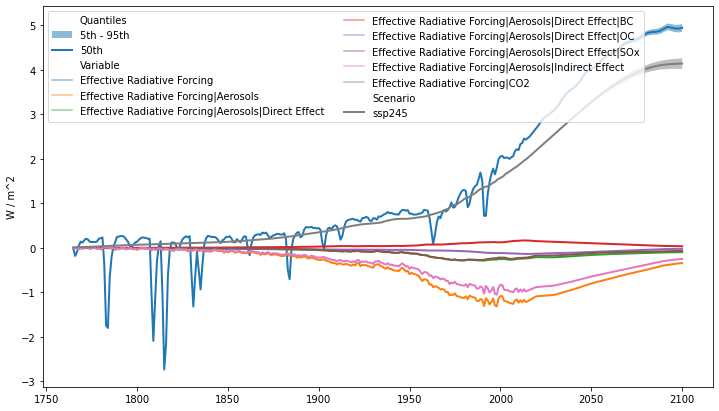

In [16]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ax, legend_items = magicc_res.filter(
    variable="Effective Radiative Forcing*", scenario="ssp245", region="World"
).plumeplot(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    ax=ax,
    time_axis="year",
)
ax.legend(handles=legend_items, ncol=2, loc="upper left")

In [17]:
# NBVAL_IGNORE_OUTPUT
magicc_res.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"], region="World"
).values.max()

2.1210181

In [18]:
# NBVAL_IGNORE_OUTPUT
magicc_res.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp126"], region="World"
).values.min()

1.5411022

In [19]:
# NBVAL_IGNORE_OUTPUT
magicc_res.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"], region="World"
).values.max()

4.6153086

In [20]:
# NBVAL_IGNORE_OUTPUT
magicc_res.filter(
    variable="Surface Air Temperature Change", year=2100, scenario=["ssp370"], region="World"
).values.min()

3.4532335

In [21]:
quantiles = openscm_runner.utils.calculate_quantiles(magicc_res, [0.05, 0.17, 0.5, 0.83, 0.95])

In [22]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change", 
    region="World",
    year=2100,
    scenario=["ssp126"],
    quantile=0.05,
).values[0][0]

1.585145425

In [23]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp126"],
    quantile=0.95,
).values[0][0]

2.07807394

In [24]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp370"],
    quantile=0.05,
).values[0][0]

3.4532335

In [25]:
# NBVAL_IGNORE_OUTPUT
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp370"],
    quantile=0.95,
).values[0][0]

4.532341124999999